In [1]:
import tensorflow as tf
from tensorflow import keras

import os
import tempfile

import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

import sklearn
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
#tf.autograph.set_verbosity(0)

import logging
logging.getLogger("tensorflow").setLevel(logging.ERROR)

In [2]:
mpl.rcParams['figure.figsize'] = (15, 18)
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

In [3]:
file = tf.keras.utils
raw_df = pd.read_csv('day_approach_maskedID_timeseries.csv')
convert_dict = {'nr. sessions': int } #convert nr.sessions to int 
raw_df = raw_df.astype(convert_dict)
raw_df.head()

,nr. sessions,total km,km Z3-4,km Z5-T1-T2,km sprinting,strength training,hours alternative,perceived exertion,perceived trainingSuccess,perceived recovery,...,km Z5-T1-T2.6,km sprinting.6,strength training.6,hours alternative.6,perceived exertion.6,perceived trainingSuccess.6,perceived recovery.6,Athlete ID,injury,Date
0,1,5.8,0.0,0.6,1.2,0.0,0.00,0.11,0.00,0.18,...,0.0,0.0,0.0,1.0,0.10,0.00,0.15,0,0,0
1,0,0.0,0.0,0.0,0.0,0.0,0.00,-0.01,-0.01,-0.01,...,0.5,1.2,0.0,0.0,0.10,0.00,0.17,0,0,1
2,1,0.0,0.0,0.0,0.0,1.0,0.00,0.10,0.00,0.17,...,0.0,0.0,0.0,0.0,-0.01,-0.01,-0.01,0,0,2
3,0,0.0,0.0,0.0,0.0,0.0,0.00,-0.01,-0.01,-0.01,...,0.0,0.0,1.0,0.0,0.10,0.00,0.17,0,0,3
4,1,0.0,0.0,0.0,0.0,0.0,1.08,0.08,0.00,0.18,...,0.0,0.0,0.0,0.0,0.11,0.00,0.17,0,0,4


In [4]:
neg, pos = np.bincount(raw_df['injury'])
total = neg + pos
print('Examples:\n    Total: {}\n    Positive: {} ({:.2f}% of total)\n'.format(
    total, pos, 100 * pos / total))

Examples:
    Total: 42766
    Positive: 583 (1.36% of total)



In [5]:
cleaned_df = raw_df.copy()
cleaned_df.pop('Date')
cleaned_df.pop('Athlete ID')

0         0
1         0
2         0
3         0
4         0
         ..
42761    71
42762    71
42763    71
42764    71
42765    71
Name: Athlete ID, Length: 42766, dtype: int64

In [6]:
cleaned_df.head()

,nr. sessions,total km,km Z3-4,km Z5-T1-T2,km sprinting,strength training,hours alternative,perceived exertion,perceived trainingSuccess,perceived recovery,...,total km.6,km Z3-4.6,km Z5-T1-T2.6,km sprinting.6,strength training.6,hours alternative.6,perceived exertion.6,perceived trainingSuccess.6,perceived recovery.6,injury
0,1,5.8,0.0,0.6,1.2,0.0,0.00,0.11,0.00,0.18,...,0.0,0.0,0.0,0.0,0.0,1.0,0.10,0.00,0.15,0
1,0,0.0,0.0,0.0,0.0,0.0,0.00,-0.01,-0.01,-0.01,...,5.2,0.0,0.5,1.2,0.0,0.0,0.10,0.00,0.17,0
2,1,0.0,0.0,0.0,0.0,1.0,0.00,0.10,0.00,0.17,...,0.0,0.0,0.0,0.0,0.0,0.0,-0.01,-0.01,-0.01,0
3,0,0.0,0.0,0.0,0.0,0.0,0.00,-0.01,-0.01,-0.01,...,0.0,0.0,0.0,0.0,1.0,0.0,0.10,0.00,0.17,0
4,1,0.0,0.0,0.0,0.0,0.0,1.08,0.08,0.00,0.18,...,17.6,7.2,0.0,0.0,0.0,0.0,0.11,0.00,0.17,0


In [7]:
# Use a utility from sklearn to split and shuffle your dataset.
train_df, test_df = train_test_split(cleaned_df, test_size=0.3)
train_df, val_df = train_test_split(train_df, test_size=0.3)

# Form np arrays of labels and features.
train_labels = np.array(train_df.pop('injury'))
val_labels = np.array(val_df.pop('injury'))
test_labels = np.array(test_df.pop('injury'))

train_features = np.array(train_df)
val_features = np.array(val_df)
test_features = np.array(test_df)

for i in val_labels:
    if i != 0:
        print(i)

In [8]:
scaler = StandardScaler()
train_features = scaler.fit_transform(train_features)

val_features = scaler.transform(val_features)
test_features = scaler.transform(test_features)

#train_features = np.clip(train_features, -5, 5)
#val_features = np.clip(val_features, -5, 5)
#test_features = np.clip(test_features, -5, 5)


print('Training labels shape:', train_labels.shape)
print('Validation labels shape:', val_labels.shape)
print('Test labels shape:', test_labels.shape)

print('Training features shape:', train_features.shape)
print('Validation features shape:', val_features.shape)
print('Test features shape:', test_features.shape)

Training labels shape: (20955,)
Validation labels shape: (8981,)
Test labels shape: (12830,)
Training features shape: (20955, 70)
Validation features shape: (8981, 70)
Test features shape: (12830, 70)


In [9]:
METRICS = [
      keras.metrics.TruePositives(name='tp'),
      keras.metrics.FalsePositives(name='fp'),
      keras.metrics.TrueNegatives(name='tn'),
      keras.metrics.FalseNegatives(name='fn'), 
      keras.metrics.BinaryAccuracy(name='accuracy'),
      keras.metrics.Precision(name='precision'),
      keras.metrics.Recall(name='recall'),
      keras.metrics.AUC(name='auc'),
      keras.metrics.AUC(name='prc', curve='PR'), # precision-recall curve
]

#create the model 
def make_model(metrics=METRICS, output_bias=None):
    if output_bias is not None:
        output_bias = tf.keras.initializers.Constant(output_bias)
    model = keras.Sequential([keras.layers.Dense(16, activation='relu',input_shape=(train_features.shape[-1],)),
      keras.layers.Dropout(0.5),
      keras.layers.Dense(1, activation='sigmoid',
                         bias_initializer=output_bias),
  ])

    model.compile(
      optimizer=keras.optimizers.Adam(learning_rate=1e-3),
      loss=keras.losses.BinaryCrossentropy(),
      metrics=metrics)

    return model

2022-10-12 18:07:41.465270: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [10]:
EPOCHS = 200
BATCH_SIZE = 2048

early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_prc', 
    verbose=1,
    patience=10,
    mode='max',
    restore_best_weights=True)

The batch size is a number of samples processed before the model is updated. The number of epochs is the number of complete passes through the training dataset. The size of a batch must be more than or equal to one and less than or equal to the number of samples in the training dataset

In [11]:
model = make_model()
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                1136      
                                                                 
 dropout (Dropout)           (None, 16)                0         
                                                                 
 dense_1 (Dense)             (None, 1)                 17        
                                                                 
Total params: 1,153
Trainable params: 1,153
Non-trainable params: 0
_________________________________________________________________


In [12]:
model.predict(train_features[:10])

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
1/1 [==============================] - 0s 268ms/step


array([[0.483125  ],
       [0.09907348],
       [0.05108692],
       [0.01117394],
       [0.4132968 ],
       [0.4660509 ],
       [0.0921387 ],
       [0.93888587],
       [0.07992816],
       [0.11902053]], dtype=float32)

In [13]:
results = model.evaluate(train_features, train_labels, batch_size=BATCH_SIZE, verbose=1)
print("Loss: {:0.4f}".format(results[0]))


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
11/11 [==============================] - 5s 5ms/step - loss: 0.4194 - tp: 64.0000 - fp: 3520.0000 - tn: 17149.0000 - fn: 222.0000 - accuracy: 0.8214 - precision: 0.0179 - recall: 0.2238 - auc: 0.5682 - prc: 0.0178
Loss: 0.4194


In [14]:
initial_bias = np.log([pos/neg])
initial_bias

array([-4.28158539])

In [15]:
model = make_model(output_bias=initial_bias)
model.predict(train_features[:10])

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
1/1 [==============================] - 0s 213ms/step


array([[0.00740411],
       [0.03674661],
       [0.00352976],
       [0.04068253],
       [0.00924006],
       [0.08744532],
       [0.01391569],
       [0.00790247],
       [0.02852633],
       [0.01227754]], dtype=float32)

In [16]:
results = model.evaluate(train_features, train_labels, batch_size=BATCH_SIZE, verbose=1)
print("Loss: {:0.4f}".format(results[0]))

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
11/11 [==============================] - 7s 16ms/step - loss: 0.1080 - tp: 70.0000 - fp: 3728.0000 - tn: 37610.0000 - fn: 502.0000 - accuracy: 0.8991 - precision: 0.0184 - recall: 0.1224 - auc: 0.5456 - prc: 0.0171
Loss: 0.1080


In [17]:
initial_weights = os.path.join(tempfile.mkdtemp(), 'initial_weights')
model.save_weights(initial_weights)

In [18]:
model = make_model()
model.load_weights(initial_weights)
model.layers[-1].bias.assign([0.0])
zero_bias_history = model.fit(
    train_features,
    train_labels,
    batch_size=BATCH_SIZE,
    epochs=20,
    validation_data=(val_features, val_labels), 
    verbose=1)

Epoch 1/20
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
 4/11 [=========>....................] - ETA: 0s - loss: 1.2658 - tp: 138.0000 - fp: 8310.0000 - tn: 41100.0000 - fn: 554.0000 - accuracy: 0.8231 - precision: 0.0163 - recall: 0.1994 - auc: 0.5410 - prc: 0.0158WARNING: AutoGraph could not transform <function Model.make_test_function.<locals>.test_function at 0x7f89c87f0050> and will run it as-is.
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
11/11 [===========

11/11 [==============================] - 0s 38ms/step - loss: 0.2340 - tp: 30.0000 - fp: 1708.0000 - tn: 18961.0000 - fn: 256.0000 - accuracy: 0.9063 - precision: 0.0173 - recall: 0.1049 - auc: 0.5163 - prc: 0.0150 - val_loss: 0.1020 - val_tp: 0.0000e+00 - val_fp: 11.0000 - val_tn: 8854.0000 - val_fn: 116.0000 - val_accuracy: 0.9859 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_auc: 0.5458 - val_prc: 0.0148
Epoch 18/20
11/11 [==============================] - 0s 35ms/step - loss: 0.2223 - tp: 29.0000 - fp: 1630.0000 - tn: 19039.0000 - fn: 257.0000 - accuracy: 0.9099 - precision: 0.0175 - recall: 0.1014 - auc: 0.5448 - prc: 0.0157 - val_loss: 0.0986 - val_tp: 0.0000e+00 - val_fp: 8.0000 - val_tn: 8857.0000 - val_fn: 116.0000 - val_accuracy: 0.9862 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_auc: 0.5465 - val_prc: 0.0149
Epoch 19/20
11/11 [==============================] - 0s 30ms/step - loss: 0.2188 - tp: 27.0000 - fp: 1509.0000 - tn: 19160.0000 - fn: 259.000

In [19]:
model = make_model()
model.load_weights(initial_weights)
careful_bias_history = model.fit(
    train_features,
    train_labels,
    batch_size=BATCH_SIZE,
    epochs=20,
    validation_data=(val_features, val_labels), 
    verbose=1)

Epoch 1/20
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
 8/11 [====================>.........] - ETA: 0s - loss: 0.1655 - tp: 17.0000 - fp: 559.0000 - tn: 24467.0000 - fn: 322.0000 - accuracy: 0.9653 - precision: 0.0295 - recall: 0.0501 - auc: 0.5502 - prc: 0.0177WARNING: AutoGraph could not transform <function Model.make_test_function.<locals>.test_function at 0x7f89cd38e9e0> and will run it as-is.
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
11/11 [=============

11/11 [==============================] - 0s 35ms/step - loss: 0.0790 - tp: 0.0000e+00 - fp: 10.0000 - tn: 20659.0000 - fn: 286.0000 - accuracy: 0.9859 - precision: 0.0000e+00 - recall: 0.0000e+00 - auc: 0.5825 - prc: 0.0198 - val_loss: 0.0709 - val_tp: 0.0000e+00 - val_fp: 0.0000e+00 - val_tn: 8865.0000 - val_fn: 116.0000 - val_accuracy: 0.9871 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_auc: 0.5693 - val_prc: 0.0164
Epoch 18/20
11/11 [==============================] - 0s 36ms/step - loss: 0.0772 - tp: 1.0000 - fp: 9.0000 - tn: 20660.0000 - fn: 285.0000 - accuracy: 0.9860 - precision: 0.1000 - recall: 0.0035 - auc: 0.6113 - prc: 0.0219 - val_loss: 0.0707 - val_tp: 0.0000e+00 - val_fp: 0.0000e+00 - val_tn: 8865.0000 - val_fn: 116.0000 - val_accuracy: 0.9871 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_auc: 0.5799 - val_prc: 0.0166
Epoch 19/20
11/11 [==============================] - 0s 25ms/step - loss: 0.0768 - tp: 0.0000e+00 - fp: 12.0000 - tn: 20657.0000 

In [20]:
def plot_loss(history, label, n):
  # Use a log scale on y-axis to show the wide range of values.
  plt.semilogy(history.epoch, history.history['loss'],
               color=colors[n], label='Train ' + label)
  plt.semilogy(history.epoch, history.history['val_loss'],
               color=colors[n], label='Val ' + label,
               linestyle="--")
  plt.xlabel('Epoch')
  plt.ylabel('Loss')

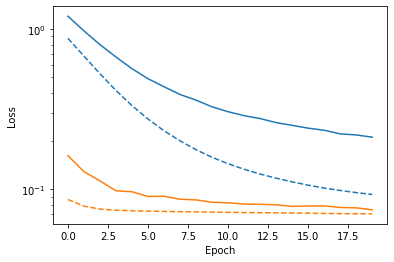

In [21]:
plot_loss(zero_bias_history, "Zero Bias", 0)
plot_loss(careful_bias_history, "Careful Bias", 1)

In [22]:
model = make_model()
model.load_weights(initial_weights)
baseline_history = model.fit(
    train_features,
    train_labels,
    batch_size=BATCH_SIZE,
    epochs=EPOCHS,
    callbacks=[early_stopping],
    validation_data=(val_features, val_labels))

Epoch 1/200
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
11/11 [==============================] - ETA: 0s - loss: 0.1599 - tp: 20.0000 - fp: 661.0000 - tn: 28873.0000 - fn: 382.0000 - accuracy: 0.9652 - precision: 0.0294 - recall: 0.0498 - auc: 0.5389 - prc: 0.0171WARNING: AutoGraph could not transform <function Model.make_test_function.<locals>.test_function at 0x7f89ca670d40> and will run it as-is.
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
11/11 [============

11/11 [==============================] - 0s 27ms/step - loss: 0.0774 - tp: 1.0000 - fp: 10.0000 - tn: 20659.0000 - fn: 285.0000 - accuracy: 0.9859 - precision: 0.0909 - recall: 0.0035 - auc: 0.6026 - prc: 0.0228 - val_loss: 0.0711 - val_tp: 0.0000e+00 - val_fp: 0.0000e+00 - val_tn: 8865.0000 - val_fn: 116.0000 - val_accuracy: 0.9871 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_auc: 0.5643 - val_prc: 0.0162
Epoch 18/200
11/11 [==============================] - 0s 32ms/step - loss: 0.0794 - tp: 1.0000 - fp: 11.0000 - tn: 20658.0000 - fn: 285.0000 - accuracy: 0.9859 - precision: 0.0833 - recall: 0.0035 - auc: 0.5867 - prc: 0.0183 - val_loss: 0.0709 - val_tp: 0.0000e+00 - val_fp: 0.0000e+00 - val_tn: 8865.0000 - val_fn: 116.0000 - val_accuracy: 0.9871 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_auc: 0.5675 - val_prc: 0.0163
Epoch 19/200
11/11 [==============================] - 0s 21ms/step - loss: 0.0760 - tp: 0.0000e+00 - fp: 4.0000 - tn: 20665.0000 - fn: 286.

11/11 [==============================] - 0s 27ms/step - loss: 0.0710 - tp: 0.0000e+00 - fp: 2.0000 - tn: 20667.0000 - fn: 286.0000 - accuracy: 0.9863 - precision: 0.0000e+00 - recall: 0.0000e+00 - auc: 0.6625 - prc: 0.0260 - val_loss: 0.0694 - val_tp: 0.0000e+00 - val_fp: 0.0000e+00 - val_tn: 8865.0000 - val_fn: 116.0000 - val_accuracy: 0.9871 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_auc: 0.5975 - val_prc: 0.0176
Epoch 36/200
11/11 [==============================] - 1s 63ms/step - loss: 0.0718 - tp: 1.0000 - fp: 3.0000 - tn: 20666.0000 - fn: 285.0000 - accuracy: 0.9863 - precision: 0.2500 - recall: 0.0035 - auc: 0.6665 - prc: 0.0277 - val_loss: 0.0693 - val_tp: 0.0000e+00 - val_fp: 0.0000e+00 - val_tn: 8865.0000 - val_fn: 116.0000 - val_accuracy: 0.9871 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_auc: 0.5970 - val_prc: 0.0174
Epoch 37/200
11/11 [==============================] - 0s 29ms/step - loss: 0.0711 - tp: 1.0000 - fp: 3.0000 - tn: 20666.0000 - fn

Epoch 54/200
11/11 [==============================] - 0s 25ms/step - loss: 0.0688 - tp: 1.0000 - fp: 1.0000 - tn: 20668.0000 - fn: 285.0000 - accuracy: 0.9864 - precision: 0.5000 - recall: 0.0035 - auc: 0.6947 - prc: 0.0405 - val_loss: 0.0686 - val_tp: 0.0000e+00 - val_fp: 0.0000e+00 - val_tn: 8865.0000 - val_fn: 116.0000 - val_accuracy: 0.9871 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_auc: 0.6080 - val_prc: 0.0183
Epoch 55/200
11/11 [==============================] - 0s 22ms/step - loss: 0.0697 - tp: 0.0000e+00 - fp: 5.0000 - tn: 20664.0000 - fn: 286.0000 - accuracy: 0.9861 - precision: 0.0000e+00 - recall: 0.0000e+00 - auc: 0.6898 - prc: 0.0320 - val_loss: 0.0685 - val_tp: 0.0000e+00 - val_fp: 0.0000e+00 - val_tn: 8865.0000 - val_fn: 116.0000 - val_accuracy: 0.9871 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_auc: 0.6070 - val_prc: 0.0187
Epoch 56/200
11/11 [==============================] - 0s 23ms/step - loss: 0.0682 - tp: 0.0000e+00 - fp: 1.0000 - tn

11/11 [==============================] - 0s 19ms/step - loss: 0.0679 - tp: 0.0000e+00 - fp: 2.0000 - tn: 20667.0000 - fn: 286.0000 - accuracy: 0.9863 - precision: 0.0000e+00 - recall: 0.0000e+00 - auc: 0.7153 - prc: 0.0450 - val_loss: 0.0684 - val_tp: 0.0000e+00 - val_fp: 0.0000e+00 - val_tn: 8865.0000 - val_fn: 116.0000 - val_accuracy: 0.9871 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_auc: 0.6175 - val_prc: 0.0196
Epoch 73/200
11/11 [==============================] - 0s 17ms/step - loss: 0.0678 - tp: 1.0000 - fp: 0.0000e+00 - tn: 20669.0000 - fn: 285.0000 - accuracy: 0.9864 - precision: 1.0000 - recall: 0.0035 - auc: 0.7049 - prc: 0.0402 - val_loss: 0.0684 - val_tp: 0.0000e+00 - val_fp: 0.0000e+00 - val_tn: 8865.0000 - val_fn: 116.0000 - val_accuracy: 0.9871 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_auc: 0.6193 - val_prc: 0.0198
Epoch 74/200
11/11 [==============================] - 0s 25ms/step - loss: 0.0684 - tp: 0.0000e+00 - fp: 4.0000 - tn: 20665.0

In [23]:
def plot_metrics(history):
  metrics = ['loss', 'prc', 'precision', 'recall']
  for n, metric in enumerate(metrics):
    name = metric.replace("_"," ").capitalize()
    plt.subplot(2,2,n+1)
    plt.plot(history.epoch, history.history[metric], color=colors[0], label='Train')
    plt.plot(history.epoch, history.history['val_'+metric],
             color=colors[0], linestyle="--", label='Val')
    plt.xlabel('Epoch')
    plt.ylabel(name)
    if metric == 'loss':
      plt.ylim([0, 0.2])
    elif metric == 'auc':
      plt.ylim([1,1])
    elif metric == 'precision':
      plt.ylim([0,2])
    else:
      plt.ylim([0,0.1])

    plt.legend()

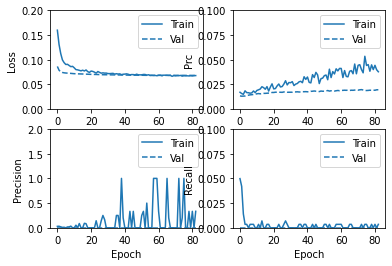

In [24]:
plot_metrics(baseline_history)

In [25]:
train_predictions_baseline = model.predict(train_features, batch_size=BATCH_SIZE)
test_predictions_baseline = model.predict(test_features, batch_size=BATCH_SIZE)

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
7/7 [==============================] - 0s 5ms/step


In [26]:
def plot_cm(labels, predictions, p=0.5):
  cm = confusion_matrix(labels, predictions > p)
  plt.figure(figsize=(5,5))
  sns.heatmap(cm, annot=True, fmt="d")
  plt.title('Confusion matrix @{:.2f}'.format(p))
  plt.ylabel('Actual label')
  plt.xlabel('Predicted label')

  print('Legitimate Transactions Detected (True Negatives): ', cm[0][0])
  print('Legitimate Transactions Incorrectly Detected (False Positives): ', cm[0][1])
  print('Fraudulent Transactions Missed (False Negatives): ', cm[1][0])
  print('Fraudulent Transactions Detected (True Positives): ', cm[1][1])
  print('Total Fraudulent Transactions: ', np.sum(cm[1]))

loss :  0.07457385957241058
tp :  0.0
fp :  1.0
tn :  12648.0
fn :  181.0
accuracy :  0.9858145117759705
precision :  0.0
recall :  0.0
auc :  0.6009399890899658
prc :  0.02049091085791588

Legitimate Transactions Detected (True Negatives):  12648
Legitimate Transactions Incorrectly Detected (False Positives):  1
Fraudulent Transactions Missed (False Negatives):  181
Fraudulent Transactions Detected (True Positives):  0
Total Fraudulent Transactions:  181


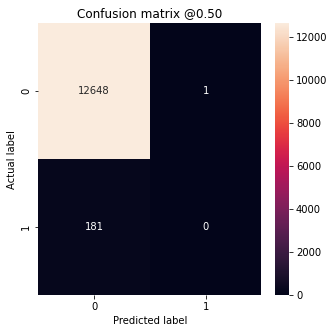

In [27]:
baseline_results = model.evaluate(test_features, test_labels,
                                  batch_size=BATCH_SIZE, verbose=0)
for name, value in zip(model.metrics_names, baseline_results):
  print(name, ': ', value)
print()

plot_cm(test_labels, test_predictions_baseline)

In [28]:
def plot_roc(name, labels, predictions, **kwargs):
  fp, tp, _ = sklearn.metrics.roc_curve(labels, predictions)

  plt.plot(100*fp, 100*tp, label=name, linewidth=2, **kwargs)
  plt.xlabel('False positives [%]')
  plt.ylabel('True positives [%]')
  plt.xlim([-0.5,100])
  plt.ylim([0,100])
  plt.grid(True)
  ax = plt.gca()
  ax.set_aspect('equal')

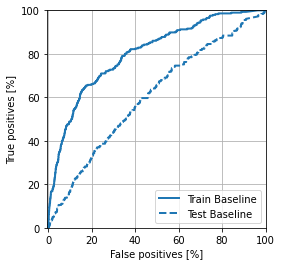

In [29]:
plot_roc("Train Baseline", train_labels, train_predictions_baseline, color=colors[0])
plot_roc("Test Baseline", test_labels, test_predictions_baseline, color=colors[0], linestyle='--')
plt.legend(loc='lower right');

In [30]:
# Scaling by total/2 helps keep the loss to a similar magnitude.
# The sum of the weights of all examples stays the same.
weight_for_0 = (1 / neg) * (total / 2.0)
weight_for_1 = (1 / pos) * (total / 2.0)

class_weight = {0: weight_for_0, 1: weight_for_1}

print('Weight for class 0: {:.2f}'.format(weight_for_0))
print('Weight for class 1: {:.2f}'.format(weight_for_1))

Weight for class 0: 0.51
Weight for class 1: 36.68


In [31]:
weighted_model = make_model()
weighted_model.load_weights(initial_weights)

weighted_history = weighted_model.fit(
    train_features,
    train_labels,
    batch_size=BATCH_SIZE,
    epochs=EPOCHS,
    callbacks=[early_stopping],
    validation_data=(val_features, val_labels),
    # The class weights go here
    class_weight=class_weight)

Epoch 1/200
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
 1/11 [=>............................] - ETA: 1:32 - loss: 1.2392 - tp: 1.0000 - fp: 84.0000 - tn: 14589.0000 - fn: 204.0000 - accuracy: 0.9806 - precision: 0.0118 - recall: 0.0049 - auc: 0.6009 - prc: 0.0198WARNING: AutoGraph could not transform <function Model.make_test_function.<locals>.test_function at 0x7f89d1a9bb00> and will run it as-is.
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
11/11 [============

Epoch 18/200
11/11 [==============================] - 0s 31ms/step - loss: 1.1050 - tp: 115.0000 - fp: 4613.0000 - tn: 16056.0000 - fn: 171.0000 - accuracy: 0.7717 - precision: 0.0243 - recall: 0.4021 - auc: 0.6159 - prc: 0.0224 - val_loss: 0.3719 - val_tp: 27.0000 - val_fp: 1298.0000 - val_tn: 7567.0000 - val_fn: 89.0000 - val_accuracy: 0.8456 - val_precision: 0.0204 - val_recall: 0.2328 - val_auc: 0.6001 - val_prc: 0.0173
Epoch 19/200
11/11 [==============================] - 0s 30ms/step - loss: 1.1309 - tp: 108.0000 - fp: 4616.0000 - tn: 16053.0000 - fn: 178.0000 - accuracy: 0.7712 - precision: 0.0229 - recall: 0.3776 - auc: 0.5997 - prc: 0.0210 - val_loss: 0.3736 - val_tp: 26.0000 - val_fp: 1302.0000 - val_tn: 7563.0000 - val_fn: 90.0000 - val_accuracy: 0.8450 - val_precision: 0.0196 - val_recall: 0.2241 - val_auc: 0.6022 - val_prc: 0.0173
Epoch 20/200
11/11 [==============================] - 0s 41ms/step - loss: 1.1620 - tp: 100.0000 - fp: 4671.0000 - tn: 15998.0000 - fn: 186.0000

11/11 [==============================] - 0s 32ms/step - loss: 0.9829 - tp: 124.0000 - fp: 5084.0000 - tn: 15585.0000 - fn: 162.0000 - accuracy: 0.7497 - precision: 0.0238 - recall: 0.4336 - auc: 0.6315 - prc: 0.0255 - val_loss: 0.3960 - val_tp: 26.0000 - val_fp: 1379.0000 - val_tn: 7486.0000 - val_fn: 90.0000 - val_accuracy: 0.8364 - val_precision: 0.0185 - val_recall: 0.2241 - val_auc: 0.6064 - val_prc: 0.0180
Epoch 38/200
11/11 [==============================] - 0s 30ms/step - loss: 0.9432 - tp: 128.0000 - fp: 5024.0000 - tn: 15645.0000 - fn: 158.0000 - accuracy: 0.7527 - precision: 0.0248 - recall: 0.4476 - auc: 0.6472 - prc: 0.0272 - val_loss: 0.3922 - val_tp: 24.0000 - val_fp: 1341.0000 - val_tn: 7524.0000 - val_fn: 92.0000 - val_accuracy: 0.8404 - val_precision: 0.0176 - val_recall: 0.2069 - val_auc: 0.6061 - val_prc: 0.0180
Epoch 39/200
11/11 [==============================] - 0s 21ms/step - loss: 0.9877 - tp: 125.0000 - fp: 5006.0000 - tn: 15663.0000 - fn: 161.0000 - accuracy: 

11/11 [==============================] - 0s 24ms/step - loss: 0.9114 - tp: 119.0000 - fp: 5143.0000 - tn: 15526.0000 - fn: 167.0000 - accuracy: 0.7466 - precision: 0.0226 - recall: 0.4161 - auc: 0.6394 - prc: 0.0217 - val_loss: 0.4187 - val_tp: 31.0000 - val_fp: 1461.0000 - val_tn: 7404.0000 - val_fn: 85.0000 - val_accuracy: 0.8279 - val_precision: 0.0208 - val_recall: 0.2672 - val_auc: 0.6155 - val_prc: 0.0189
Epoch 57/200
11/11 [==============================] - 0s 21ms/step - loss: 0.8274 - tp: 142.0000 - fp: 5200.0000 - tn: 15469.0000 - fn: 144.0000 - accuracy: 0.7450 - precision: 0.0266 - recall: 0.4965 - auc: 0.6817 - prc: 0.0307 - val_loss: 0.4139 - val_tp: 31.0000 - val_fp: 1429.0000 - val_tn: 7436.0000 - val_fn: 85.0000 - val_accuracy: 0.8314 - val_precision: 0.0212 - val_recall: 0.2672 - val_auc: 0.6165 - val_prc: 0.0190
Epoch 58/200
11/11 [==============================] - 0s 22ms/step - loss: 0.9157 - tp: 125.0000 - fp: 5194.0000 - tn: 15475.0000 - fn: 161.0000 - accuracy: 

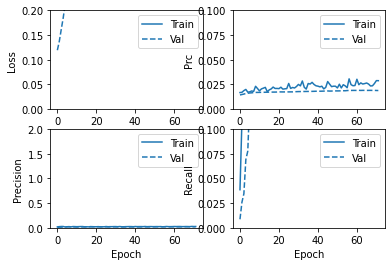

In [32]:
plot_metrics(weighted_history)

In [33]:
train_predictions_weighted = weighted_model.predict(train_features, batch_size=BATCH_SIZE)
test_predictions_weighted = weighted_model.predict(test_features, batch_size=BATCH_SIZE)

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
7/7 [==============================] - 0s 5ms/step


loss :  0.4043472707271576
tp :  48.0
fp :  1828.0
tn :  10821.0
fn :  133.0
accuracy :  0.8471550941467285
precision :  0.025586353614926338
recall :  0.265193372964859
auc :  0.6171313524246216
prc :  0.021213583648204803

Legitimate Transactions Detected (True Negatives):  10821
Legitimate Transactions Incorrectly Detected (False Positives):  1828
Fraudulent Transactions Missed (False Negatives):  133
Fraudulent Transactions Detected (True Positives):  48
Total Fraudulent Transactions:  181


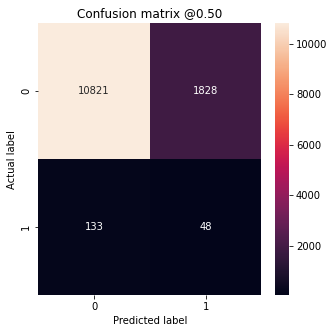

In [34]:
weighted_results = weighted_model.evaluate(test_features, test_labels,
                                           batch_size=BATCH_SIZE, verbose=0)
for name, value in zip(weighted_model.metrics_names, weighted_results):
  print(name, ': ', value)
print()

plot_cm(test_labels, test_predictions_weighted)

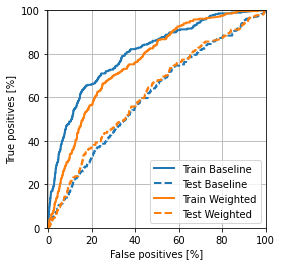

In [35]:
plot_roc("Train Baseline", train_labels, train_predictions_baseline, color=colors[0])
plot_roc("Test Baseline", test_labels, test_predictions_baseline, color=colors[0], linestyle='--')

plot_roc("Train Weighted", train_labels, train_predictions_weighted, color=colors[1])
plot_roc("Test Weighted", test_labels, test_predictions_weighted, color=colors[1], linestyle='--')


plt.legend(loc='lower right');